# Thông Tin
1. MSSV: 20520079
2. Họ và tên: Nguyễn Tư Thành Nhân
3. Bài tập: Bài tập 7
4. Ngày thực hiện: 13/05/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap7/images

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap7/images


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

## Yêu cầu 1. Xác định và hiển thị các điểm interest/key points của các cặp ảnh sau:
- cow1.jpg và cow2.jpg
- match1.jpg và match2.jpg
- graf_img1.jpg và graf_img5.jpg

In [ ]:
def Descriptor(image_path, opt = 0):
    img = cv2.imread(image_path)

    if opt == 0:
        star = cv2.xfeatures2d.StarDetector_create()
        kp = star.detect(img,None)
        brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
        kp, des = brief.compute(img, kp)
    else:
        orb = cv2.ORB_create(500)
        kp, des = orb.detectAndCompute(img,None)
    
    return kp, des

In [ ]:
def DescriptorShow(image_path, opt = 0):
    img = cv2.imread(image_path)
    kp, des = Descriptor(image_path, opt)

    img_rst = cv2.drawKeypoints(img,kp,None,(0,255,0),flags=0)
    cv2_imshow(np.hstack((img, img_rst)))
    return 

In [ ]:
# Brief desciptors, opt = 0

DescriptorShow('cow1.jpg')
DescriptorShow('cow2.jpg')

DescriptorShow('match1.jpg')
DescriptorShow('match2.jpg')

DescriptorShow('graf_img1.jpg')
DescriptorShow('graf_img5.jpg')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ORB desciptors, opt = 1

DescriptorShow('cow1.jpg', 1)
DescriptorShow('cow2.jpg', 1)

DescriptorShow('match1.jpg', 1)
DescriptorShow('match2.jpg', 1)

DescriptorShow('graf_img1.jpg', 1)
DescriptorShow('graf_img5.jpg', 1)

Output hidden; open in https://colab.research.google.com to view.

## Yêu cầu 2. Vẽ hình minh họa kết quả xác định các keypoints và descriptor cho các ảnh:

butterfly.jpg, home.jpg, simple.jpg

Với các phương pháp: BRIEF và ORB


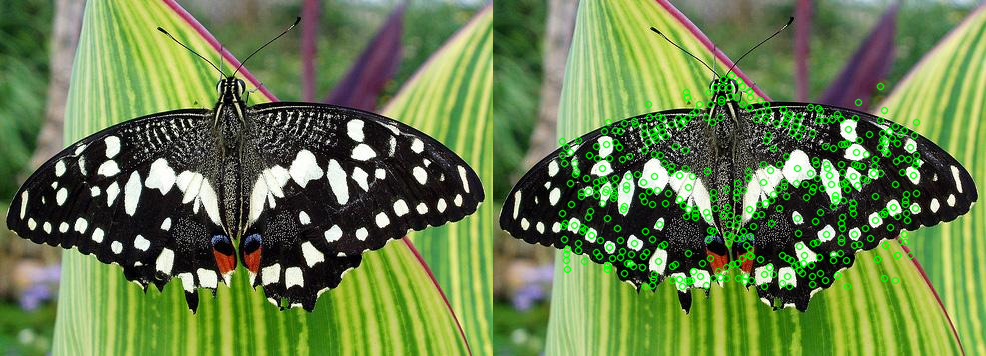

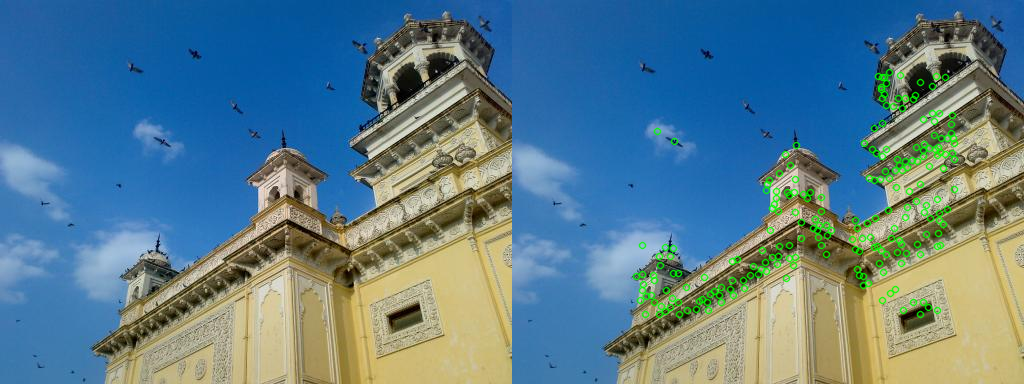

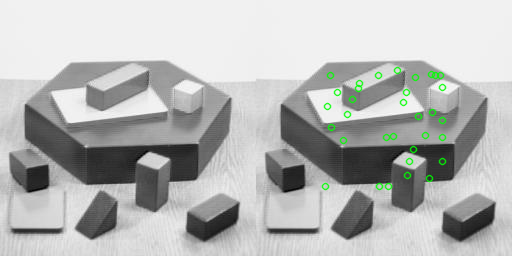

In [ ]:
# Brief desciptors, opt = 0

DescriptorShow('butterfly.jpg')
DescriptorShow('home.jpg')
DescriptorShow('simple.jpg')

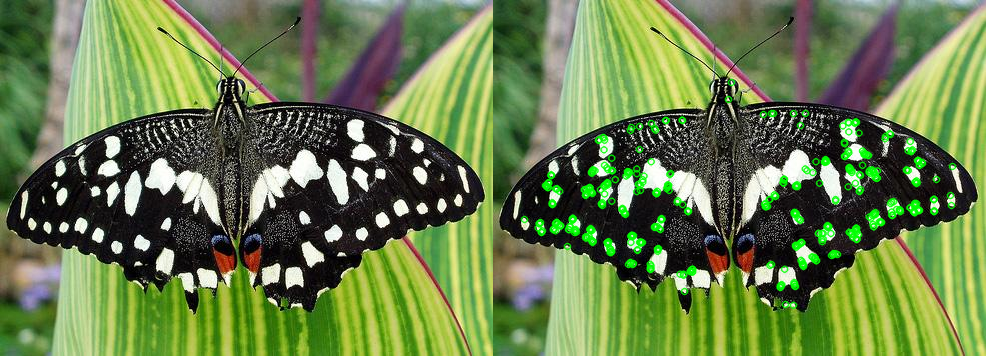

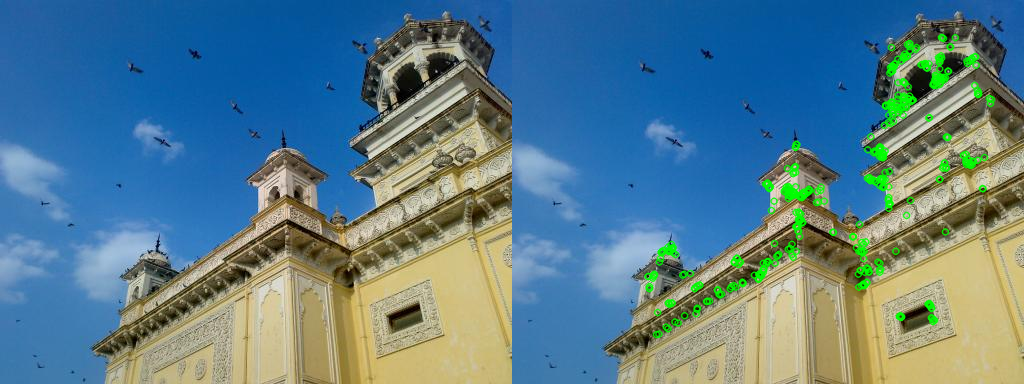

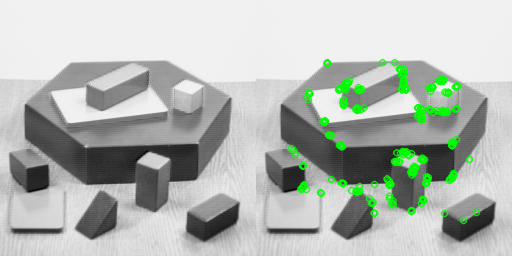

In [ ]:
# ORB desciptors, opt = 1

DescriptorShow('butterfly.jpg', 1)
DescriptorShow('home.jpg', 1)
DescriptorShow('simple.jpg', 1)

## Yêu cầu 3. Feature Matching
- Brute-Force Matching with BRIEF/ORB Descriptors
- FLANN  with BRIEF/ORB Descriptors

Cho ảnh: left.jpg và right.jpg


In [ ]:
def Matching(image_path1, image_path2, descriptor = 0, feature_matching = 0):
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    kp1, des1 = Descriptor(image_path1, descriptor)
    kp2, des2 = Descriptor(image_path2, descriptor)

    if feature_matching == 0:
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)
    else:
        des1 = np.float32(des1)
        des2 = np.float32(des2)
        FLANN_INDEX_KDTREE = 0
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params,search_params)
        matches = flann.knnMatch(des1,des2,k=2)

    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches[:20],None,flags=2)
    cv2_imshow(img3)

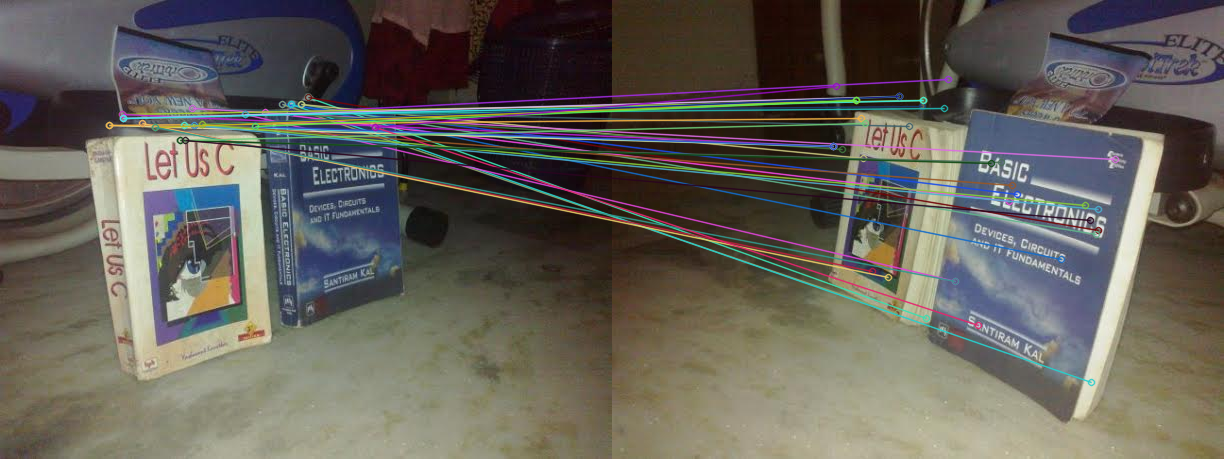

In [ ]:
# Brute-Force Matching with Brief Desciptor, descriptor = 0, feature_matching = 0
Matching('left.jpg', 'right.jpg')

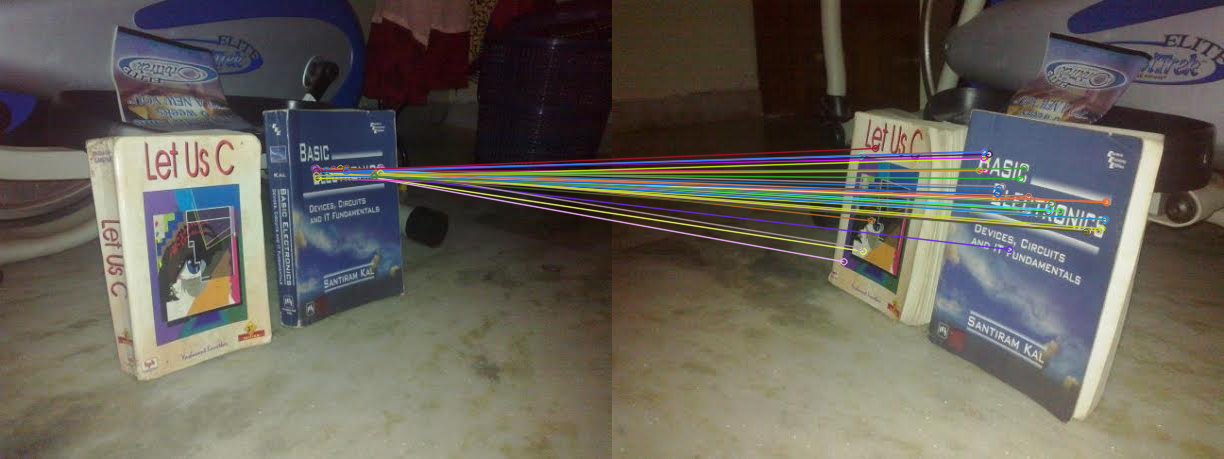

In [ ]:
# Brute-Force Matching with ORB Desciptor, descriptor = 1, feature_matching = 0
Matching('left.jpg', 'right.jpg', 1)

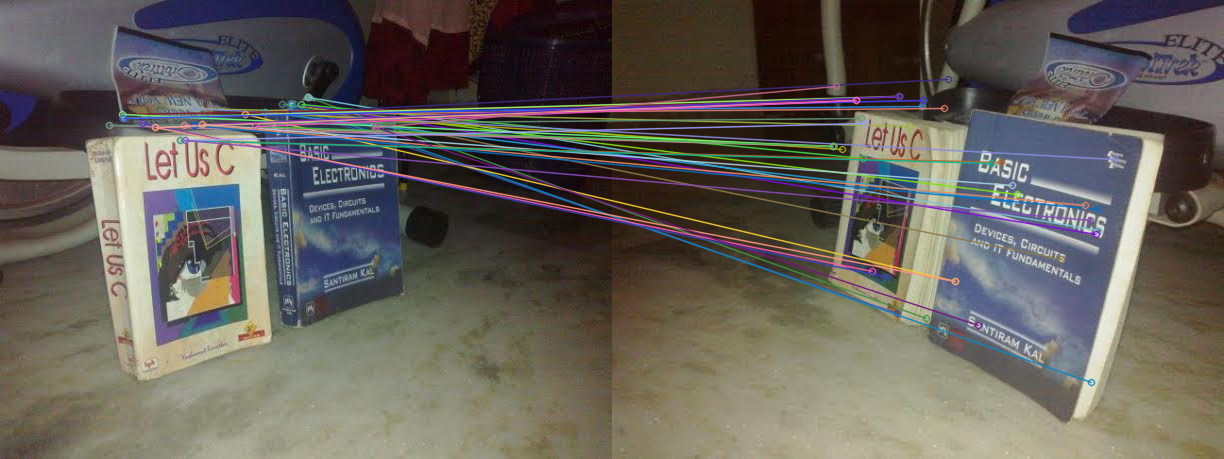

In [ ]:
# FLANN Matching with ORB Desciptor, descriptor = 0, feature_matching = 1
Matching('left.jpg', 'right.jpg', feature_matching = 1)

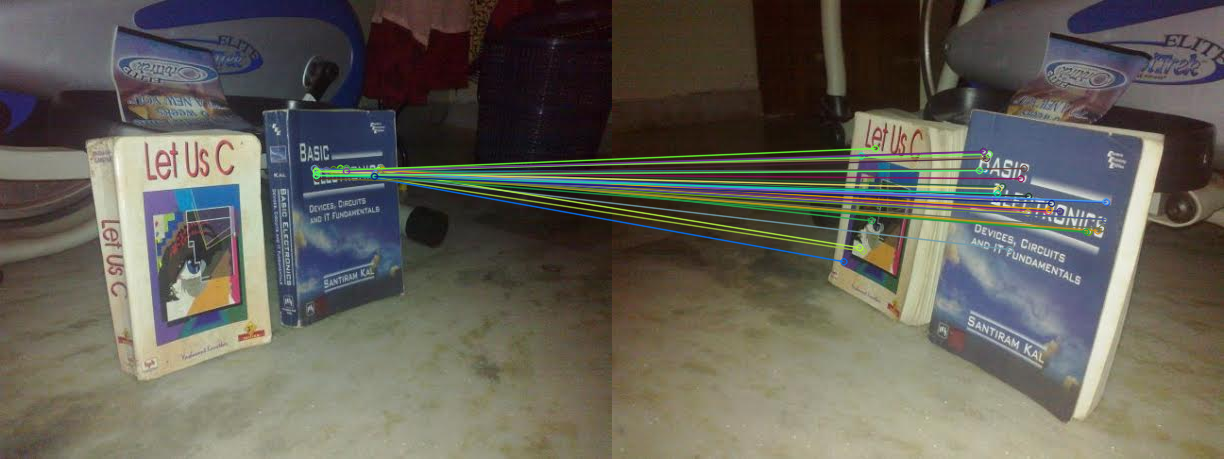

In [ ]:
# FLANN Matching with ORB Desciptor,  descriptor = 0, feature_matching = 1
Matching('left.jpg', 'right.jpg', 1, 1)